# <font color = #468bb9>Forest plot
-----

In [1]:
import sys
sys.path.insert(0, '/home/labs/hornsteinlab/hadarkl/Hadar/primals/code')


import pandas as pd
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from statsmodels.stats.multitest import multipletests

#---------------------------------------------------------------------------
#loaders
%load_ext autoreload
%autoreload 2


from utils.survival_plots import find_best_shared_split_and_plot_km, plot_forest_two_cohorts_with_statistics,plot_forest

## 📎 <font color=#CE6B31>Load Data 

In [2]:
discovery = pd.read_csv('/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/survival_analysis/cox/univariat_data/significant_proteins_discovery_fdr_to_paper.csv').drop(columns=['Unnamed: 0'])
replication= pd.read_csv('/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/survival_analysis/cox/univariat_data/significant_proteins_replication_fdr_to_paper.csv').drop(columns=['Unnamed: 0'])

In [22]:
discovery

,protein,p_value,concordance_index,hazard_ratio,CI_lower,CI_upper,FDR_adjusted_pval
0,CILP2,0.000000,0.650983,0.591399,0.493154,0.709223,0.000055
1,REG1A,0.000001,0.629534,1.513684,1.288619,1.778114,0.000336
2,GRN,0.000001,0.650086,1.541034,1.306702,1.817437,0.000336
3,MRC1,0.000003,0.640314,1.529697,1.292062,1.811114,0.000891
4,IGFBP2,0.000005,0.636588,1.504184,1.269023,1.782994,0.001140
5,ADAM15,0.000007,0.637693,1.475305,1.254887,1.734510,0.001531
6,EPHB4,0.000032,0.635415,1.515259,1.256053,1.827996,0.005687
7,IGFALS,0.000092,0.623219,0.729075,0.626061,0.849055,0.013334
8,VSIG4,0.000096,0.637899,1.411417,1.194834,1.667331,0.013334
9,FGL1,0.000118,0.625011,1.388001,1.180091,1.632593,0.014855


In [18]:
replication

,p_value,concordance_index,hazard_ratio,CI_lower,CI_upper
protein,,,,,
LRG1,0.000817,0.610778,1.327694,1.131062,1.558522
IGFBP2,0.041432,0.522480,1.190478,1.011314,1.401407
IGDCC4,0.041933,0.558064,0.833921,0.701695,0.991129


In [29]:
Relicated_proteins = ['LRG1', 'IGFBP2', 'IGDCC4']
Relicated_proteins

['LRG1', 'IGFBP2', 'IGDCC4']

-------

## <font color=#CE6B31>Forest plots : 

### Forest plot for discovery :


  

Plot saved to: /home/labs/hornsteinlab/hadarkl/Hadar/primals/code/outputs/figures/discovery.png


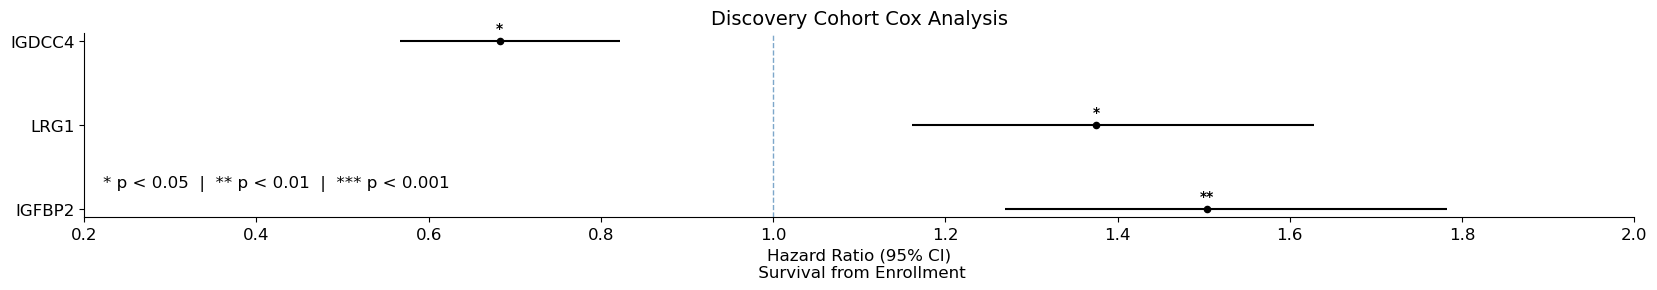

In [30]:
plot_forest(discovery, show_proteins=['LRG1', 'IGFBP2', 'IGDCC4'], sort_by="hazard_ratio", significance_column="FDR_adjusted_pval", plot_title="Discovery Cohort Cox Analysis",save_path='/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/outputs/figures/discovery.png')


### Forest plot for replication :

Plot saved to: /home/labs/hornsteinlab/hadarkl/Hadar/primals/code/outputs/figures/replication_forest_plot.png


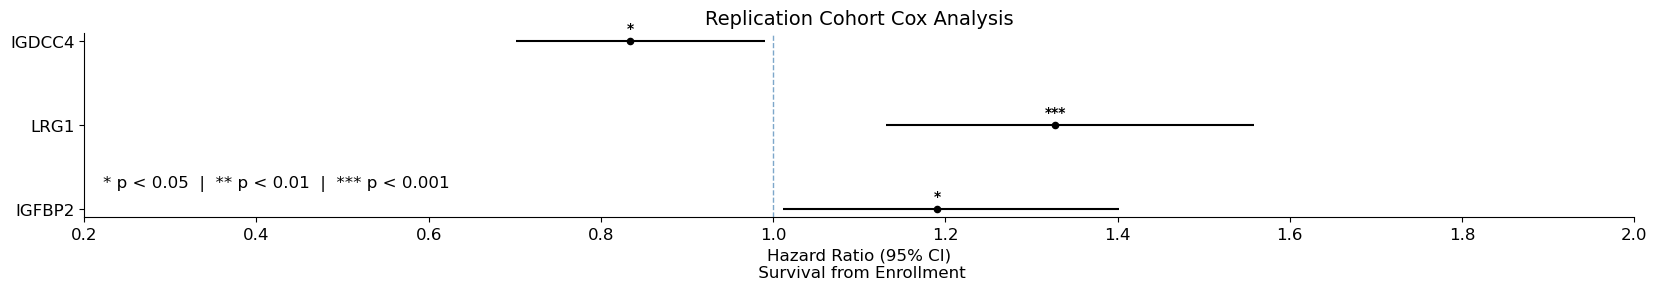

In [31]:
plot_forest(replication, show_proteins="all", sort_by="hazard_ratio", significance_column="p_value", plot_title="Replication Cohort Cox Analysis",save_path='/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/outputs/figures/replication_forest_plot.png')


### Forest plot both cohorts :

Plot saved to: /home/labs/hornsteinlab/hadarkl/Hadar/primals/code/outputs/figures/forest_plot_combined.png


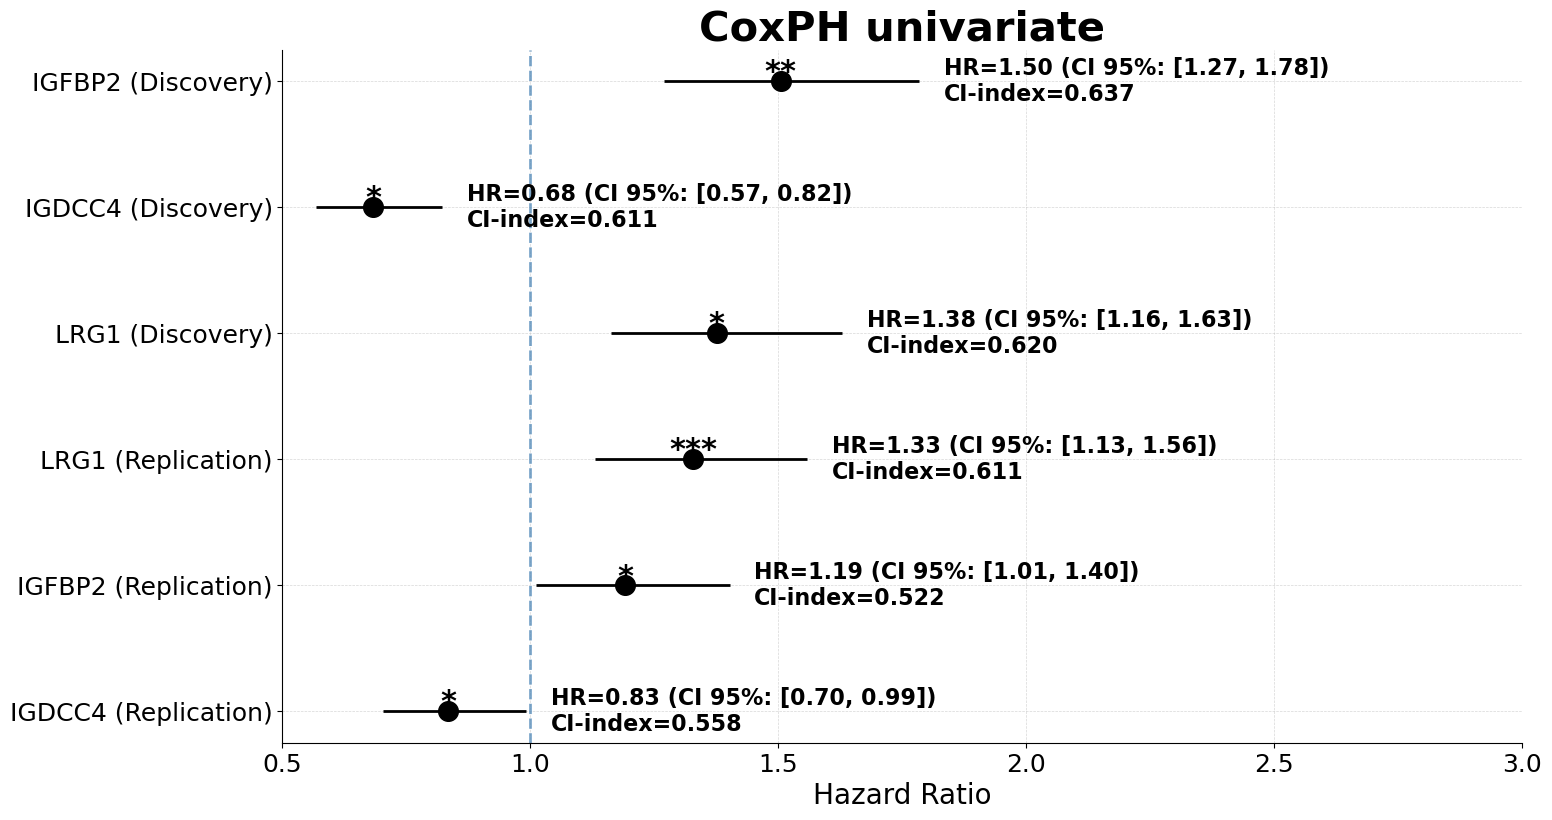

In [7]:
plot_forest_two_cohorts_with_statistics(
    discovery_df=discovery,
    replication_df= replication,
    proteins_to_plot=['LRG1', 'IGFBP2', 'IGDCC4'],
    save_path='/home/labs/hornsteinlab/hadarkl/Hadar/primals/code/outputs/figures/forest_plot_combined.png')
    
